Data
- Features :
A: Area

P: Perimeter

C: Compactness

LK: Length of Kernel

WK: Width of Kernel

A_Coef: Asymmetry Coefficient

LKG: Length of Kernel Groove
- Target :
Target class : 0, 1, 2


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Seed_Data.csv')

In [28]:
df.head()
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


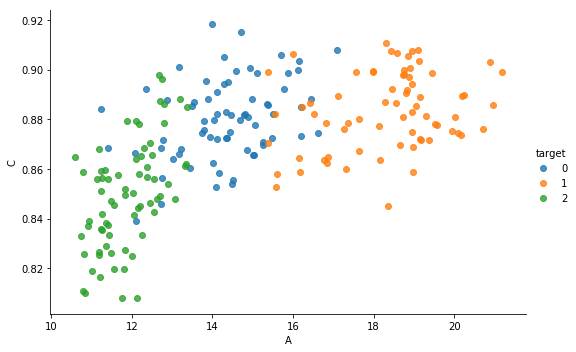

In [29]:
sns.lmplot(x='A', y='C', data=df, hue='target', aspect=1.5, fit_reg=False)


In [31]:
dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k).fit(df.drop('target', axis=1))
    
    dist[k] = km.inertia_  # Sum of squared distances of samples to their closest cluster center.

dist

{1: 2719.852410177952,
 2: 1011.7123453151189,
 3: 587.3186115940427,
 4: 471.4983093895863,
 5: 386.1072678846764,
 6: 323.2702720579794,
 7: 277.53471658879107,
 8: 240.8748596222345,
 9: 216.5702381232532}

Text(0.5, 1.0, 'Elbow Curve')

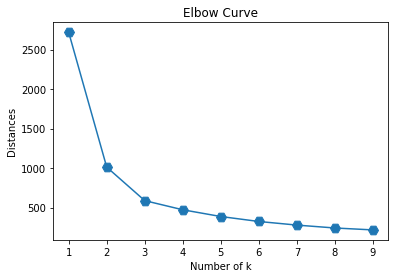

In [32]:
plt.plot(list(dist.keys()), list(dist.values()), marker='H', markersize=10)
plt.xlabel('Number of k')
plt.ylabel('Distances')
plt.title('Elbow Curve')

In [36]:
km = KMeans(n_clusters=3, random_state=42)
km_pred = km.fit_predict(df.drop('target', axis=1))
km_pred
np.array(df['target'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# Change the labels of prediction

for i in range(len(km_pred)):
    if km_pred[i] == 1:
        km_pred[i] = 0
    elif km_pred[i] == 0:
        km_pred[i] = 1

km_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [40]:
print('Accuracy of clustering : ' + str(round(sum(km_pred == df['target']) / df.shape[0] * 100, 2)) + '%')


Accuracy of clustering : 89.52%


In [43]:
df['klabels'] = km.labels_
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


In [45]:
centers = km.cluster_centers_
centers


array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

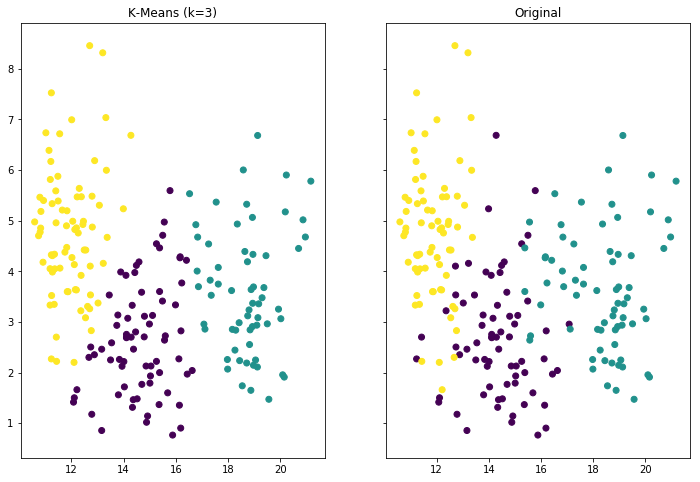

In [47]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 8))

ax1.set_title('K-Means (k=3)')
ax1.scatter(x=df['A'], y=df['A_Coef'], c=df['klabels'])
#ax1.scatter(x=centers[:, 0], y=centers[:, 5], c='r', s=300, alpha=0.5)

ax2.set_title('Original')
ax2.scatter(x=df['A'], y=df['A_Coef'], c=df['target'])

In [14]:
kmean = KMeans(n_clusters=4)

In [16]:
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmean.cluster_centers_
kmean.labels_

array([3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 0, 3, 2, 0, 2, 2,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 0, 2, 2, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

    
df

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(df['Cluster'],K.labels_))

KeyError: 'Cluster'